# RLS(Recursive Least Square)를 이용한 시계열 이상감지

# 개요

## 배경

- 이상감지 알람 메커니즘은 이상 신호 감지 → (검증) → 알람 경보 의 순서로 이루어짐.
- 시계열 이상감지 요구 사항
    - 과거의 패턴과 차이가 나는 지점을 감지
    - 넓은 범위에서 시계열 데이터의 이상감지

## 데이터 특징

- 일변량 데이터
- 학습 데이터에 이벤트 성 Outlier가 종종 등장함.
- 각 시계열 마다 학습 데이터의 길이와 특징이 모두 다름

## 시계열 예측에서의 이상감지

- 과거의 패턴을 학습하여 현재와 과거 패턴의 차이를 통해 이상을 감지함.
- 이상감지가 목표이므로, 예측 정확도보다는 과거 패턴과 현재와의 비교에 중점을 둘 필요가 있음.
- 한계
    - <b>변수가 많아질수록 계산 비용이 급수적으로 증가함.</b>
    - <b>시간이 지남에 따라 모델(파라미터) 튜닝이 필요하며 현재 데이터를 반영하지 못함.</b>
- 제안 방안
    - 예측 모델과 실제 측정값 간의 오차는 Bias와 Variance로 이루어지는데, 이 두 요소는 Trade-off 관계를 가짐.
    - 예측이 목표라면 정확도가 높은 모델을 사용해야 하지만, 이상감지가 목적이므로, 다소 정확도가 낮더라도 이상감지율에 영향을 미치지 않는 모델을 사용하려 함.
    - 시계열 예측에서 자주 사용되는 ARIMA 모델 중 MA 부분을 제거하여 계산 속도를 향상하고자 함.
    - RLS(Recursive Least Square)는 실시간 파라미터 업데이트가 가능한 모델로, Recursive 계산 방식을 시계열 모델의 최소제곱법에 적용하는 방식임.
        - 예측에 필요한 데이터 수가 적어 계산 속도가 빠른 장점을 가짐.
        - 예측력이 기존 모델과 유사하다면 충분히 활용 가능함.
    - RLS + Time Series
        - 단변량 데이터 $T$가 아래와 같다고 할 때, $t_n$과 $t_{n-s}$의 차이를 $Y$로 하고 RLS 수식을 적용함.
        - $Y$와 $\hat{Y}$의 차이가 일정 경계값 벌어질 때, $n$ 번째 데이터에 이상이 감지되었다고 판단함.
            <br>
            $T : [t_1, t_2, t_3, … , t_n, …]$
            <br>
            $\hat{t}_n  =  \mu + t_{n-s} + \beta_1 (t_{n-1} - t_{n-s-1})$
            <br>
            $\hat{t}_n - t_{n-s} = \mu + \beta_1 (t_{n-1} - t_{n-s-1})$
            <br>
            $\hat{Y} = \mu + \beta_1 X$


## Recursive Least Square 수식

$Y = WX + E$

$Y_n  = W_n X_n ^T + e_n$

-$Equation$-

1. $e_n = Y_n - X_n^T W_{n-1}$
2. $P_n^{-1} = \frac{1}{\lambda} (P_{n-1}^{-1} - \frac {P_{n-1}^{-1} X_n X_n^T P_{n-1}^{-1}}{1 + X_n^T P_{n-1}^{-1} X_n})$
3. $W_n = W_{n-1} + P_n^{-1} e_n X_n$

-$Notation$-

- $Y_n$: n번째 타겟 데이터
- $X_n$: n번째 입력 데이터
- $e_n$: n번째 타겟과 예측값간의 차이
- $P_n$: n번째 데이터까지의 공분산
- $W_n$: n번째 가중치 벡터
- $\lambda$: 망각계수; 모델이 시간에 따라 변화할 수 있도록 하는 계수 값

---

#### 가중치 업데이트 (수식3)

$W_n$에 대한 업데이트 식은 반복적 최소제곱(Recursive Least Squares, RLS) 알고리즘의 핵심 부분이며, 아래와 같이 유도할 수 있다.

우리의 목표는 예측 오차 $e_n = Y_n - X_n^T W_{n-1}$를 최소화하는 가중치 $W_n$를 찾는 것이다. 예측 오차 $e_n$의 함수로서 가중치 $W_n$를 업데이트하는 가장 간단한 방법은 경사하강법(Gradient Descent)을 사용하는 것이다. 경사하강법은 함수의 기울기(여기서는 오차 $e_n$의 기울기)를 사용하여 함수의 최솟값을 찾는 알고리즘이다.

여기서 오차 $e_n$는 $W_{n-1}$에 대한 함수이므로, $e_n$의 기울기는 가중치 $W_{n-1}$에 대한 $e_n$의 편미분이다.$e_n = Y_n - X_n^T W_{n-1}$를 $W_{n-1}$에 대해 편미분하면 $-X_n$를 얻게 된다. 따라서 오차 $e_n$의 기울기는 $-X_n$이며, 이것이 $W_{n-1}$에 더해져서 $W_n$을 계산할 수 있다. 이것이 경사하강법의 기본 아이디어이다.

  즉, $W_n = W_{n-1} - \alpha X_n$ ; ($\alpha$: 학습률)

그런데 이 경우, 오차 $e_n$의 기울기는 $X_n$이며, 이 때문에 $X_n$가 $W_n$의 업데이트에 직접적으로 기여한다. 따라서, 오차 $e_n$와 관측치 $X_n$을 모두 사용하여 가중치 $W_{n-1}$를 업데이트해야 한다. 그러나 이렇게 하면 $X_n$가 매우 크거나 작을 경우 가중치 업데이트가 과도하게 되거나 미미하게 이루어질 수 있다.

이 문제를 해결하기 위해, 우리는 가중치 업데이트에 공분산 행렬의 역행렬 $P_n^{-1}$을 도입한다. $P_n^{-1}$는 입력 데이터 $X_n$의 크기에 대한 보정 역할을 한다. $P_n^{-1}$이 $X_n$의 크기에 반비례하므로, $X_n$이 클 때는 가중치 업데이트가 감소하고, $X_n$이 작을 때는 가중치 업데이트가 증가한다. 따라서, 최종적인 가중치 업데이트 식은 아래와 같이 쓸 수 있다.

$W_n = W_{n-1} + P_n^{-1} e_n X_n$

---
#### 공분산의 역행렬 업데이트 (수식2)

**Sherman-Morrison** Equation을 통하여 $P_{n-1}$과 $X_n$을 이용하여 $P_n$ 표현

$(A + uv^T)^{-1} = A^{-1} - \frac {A^{-1} uv^T A^{-1}}{1 + v^T A^{-1} u}$

행렬 대수에서 사용되는 식으로 역행렬을 구하기 위한 방법 중 하나이다. 행렬의 역행렬을 구하는 것은 계산하기 어렵고 비효율적일 수 있는데, 이때 Rank1 업데이트가 주어지면 그 역행렬을 빠르게 계산할 수 있다.

$(A + uv^T)^{-1}$를 계산하는데, $A$의 역행렬을 사용하는 것을 확인할 수 있다. $A$의 역행렬을 알고 있다면 새로운 행렬 $(A + uv^T)^{-1}$을 빠르게 계산할 수 있다. 이는 $A$가 빈번하게 변화하는 상황에서 유용하게 사용된다. 위 식을 이용하여 이전 공분산 행렬 $P_{n-1}$, 새로운 입력 데이터 $X_n$, 그리고 망각 계수 $\lambda$을 사용하여 새로운 공분산 행렬 $P_n$의 역행렬을 업데이트 할 수 있다.

새로운 공분산 행렬은 이전 공분산 행렬과 새로운 입력 데이터로 표현할 수 있다.

$P_{n} = P_{n-1} + X_n X_n^T$

이를 Sherman-Morrison Equation에 적용하면 아래와 같다.

$A=P_n, u = X_n, v=X_n^T$

$(P_{n-1} + X_n X_n^T)^-1 = P_{n-1}^{-1} - \frac {P_{n-1}^{-1} X_n X_n^T P_{n-1}^{-1}}{1 + X_n^T P_{n-1}^{-1} X_n}$

$P_{n}^{-1} = P_{n-1}^{-1} - \frac {P_{n-1}^{-1} X_n X_n^T P_{n-1}^{-1}}{1 + X_n^T P_{n-1}^{-1} X_n}$

$P_{n}^{-1} = \frac{1}{\lambda} (P_{n-1}^{-1} - \frac {P_{n-1}^{-1} X_n X_n^T P_{n-1}^{-1}}{1 + X_n^T P_{n-1}^{-1} X_n})$

In [ ]:
import numpy as np

class RLS:
    def __init__(self, dim, lambda_, initial_variance):
        """
        Args:
            dim (int): 가중치 벡터의 차원
            lambda_ (float): 망각 계수
            initial_variance (float): 초기 공분산 역행렬의 분산 값
        """
        # 가중치 벡터와 공분산 행렬 초기화
        self.w, self.P = self.initialize(dim, initial_variance)
        # 망각 계수 설정
        self.lambda_ = lambda_

    def initialize(self, dim, initial_variance):
        """
        가중치 벡터와 공분산 역행렬을 초기화합니다.

        Args:
            dim (int): 가중치 벡터의 차원
            initial_variance (float): 초기 공분산 역행렬의 분산 값

        Returns:
            tuple: 초기 가중치 벡터와 공분산 역행렬
        """
        # 가중치 벡터를 0으로 초기화
        w = np.zeros(dim)
        # 공분산 행렬을 initial_variance로 초기화
        P = np.eye(dim) * initial_variance
        return w, P

    def compute_error(self, y, x):
        """
        실제 y값과 예측된 y값 사이의 오차를 계산합니다.

        Args:
            y (float): 실제 y값
            x (ndarray): 입력 데이터

        Returns:
            float: 오차
        """
        # 실제 y값과 예측된 y값 사이의 오차 계산
        return y - np.dot(self.w, x)

    def update_inverse_covariance(self, x):
        """
        새로운 데이터 포인트를 기반으로 공분산 행렬의 역행렬을 업데이트합니다.

        Args:
            x (ndarray): 새로운 입력 데이터
        """
        # 공분산 행렬의 역행렬 업데이트
        numerator = np.outer(np.dot(self.P, x), np.dot(x, self.P))
        denominator = self.lambda_ + np.dot(x, np.dot(self.P, x))
        self.P = self.lambda_ * (self.P - numerator / denominator)


    def update_weights(self, e, x):
        """
        오차와 새로운 데이터 포인트를 기반으로 가중치 벡터를 업데이트합니다.

        Args:
            e (float): 오차
            x (ndarray): 새로운 입력 데이터
        """
        # 가중치 벡터 업데이트
        self.w = self.w + np.dot(self.P, x) * e

    def predict(self, x):
        """
        가중치 벡터와 새로운 데이터 포인트를 기반으로 y값을 예측합니다.

        Args:
            x (ndarray): 새로운 입력 데이터

        Returns:
            float: 예측된 y값
        """
        # y값 예측
        return np.dot(self.w, x)

    def update(self, x, y):
        """
        오차를 계산하고, 공분산 역행렬과 가중치 벡터를 업데이트하고, y값을 예측합니다.

        Args:
            x (ndarray): 새로운 입력 데이터
            y (float): 실제 y값

        Returns:
            tuple: 오차와 예측된 y값
        """
        # 오차 계산
        e = self.compute_error(y, x)
        # 공분산 역행렬 업데이트
        self.update_inverse_covariance(x)
        # 가중치 벡터 업데이트
        self.update_weights(e, x)
        # y값 예측
        y_pred = self.predict(x)
        return e, y_pred

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

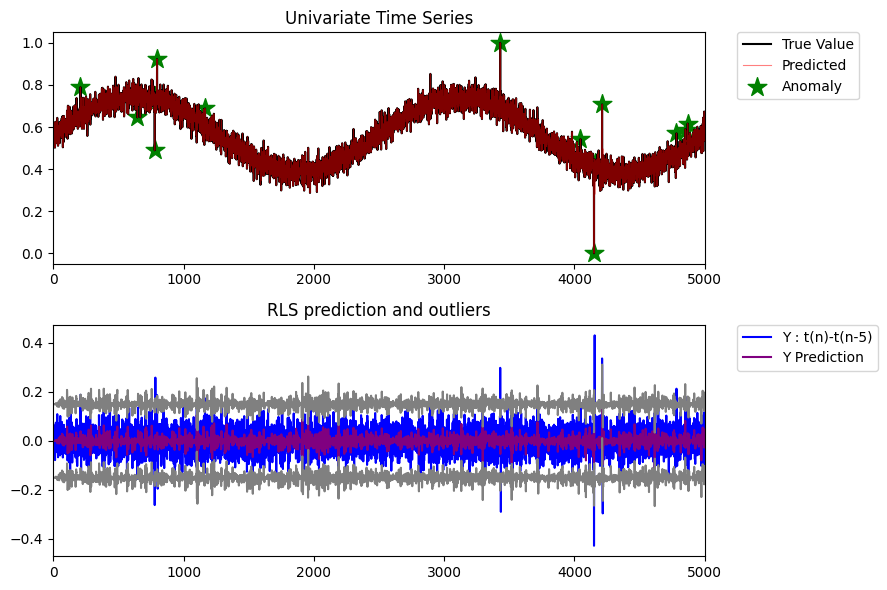

In [ ]:
# Initialize a sample time-series data
s = 5
N = 5000  # Increase N for more data points
np.random.seed(42)  # For reproducibility

# Create a time series with a sine wave, random noise, and random large peaks
t = np.sin(np.linspace(0, 4*np.pi, N)) + np.random.normal(scale=0.2, size=N)
t[np.random.randint(0, N, size=5)] += np.random.normal(scale=2, size=5)  # Add large peaks at 20 random locations

# Scale t using MinMaxScaler
scaler = MinMaxScaler()
t = scaler.fit_transform(t.reshape(-1, 1)).flatten()

# Construct Y and X
Y = np.array([t[i+s+1] - t[i+1] for i in range(N-s-1)])
X = np.array([[t[i+s] - t[i]] for i in range(N-s-1)])

# Set the forgetting factor and initial variance
lambda_ = 0.85
initial_variance = 1.0

errors = []
predictions = []

rls = RLS(dim=X.shape[1], lambda_=lambda_, initial_variance=initial_variance)

for x, y in zip(X, Y):
    error, y_pred = rls.update(x, y)
    errors.append(error)
    predictions.append(y_pred)

# Set Threshold
threshold = 0.15

# Initialize t_pred with the initial values of t
t_pred = list(t[:s+1])
anomalies = []
anomaly_indices = []

# pad Value
pad_value = s+1
# pad 함수를 사용해 배열 앞에 0을 추가
Y = np.pad(Y, (pad_value, 0), 'constant', constant_values=0)
predictions = np.array(predictions)
predictions = np.pad(predictions, (pad_value, 0), 'constant', constant_values=0)

# Generate t_pred from y_pred
for i in range(N-s-1):
    if abs(Y[i]-predictions[i]) > threshold:
        anomalies.append(t[i])
        anomaly_indices.append(i)
        t_pred.append(t[i+s+1] + predictions[i])  # Replace the true value with the predicted value
    else:
        t_pred.append(t[i+s+1])  # Else, use the true value

# Convert list to numpy array
t_pred = np.array(t_pred)

fig, axs = plt.subplots(2, 1, figsize=(9, 6))

# Set the boundaries for the X-axis
xmin, xmax = 0, 5000

# plot T and T_reconstruct for comparison
axs[0].plot(t, label="True Value", c='k')
axs[0].plot(t_pred, label="Predicted", c='r', linewidth=0.8, alpha=0.5)
axs[0].scatter(anomaly_indices, anomalies, s=200, marker='*', color='green',
               label='Anomaly')
axs[0].set_xlim(xmin, xmax)
axs[0].set_title("Univariate Time Series")

# plot Y and Y_pred for comparison
axs[1].plot(Y, label=f"Y : t(n)-t(n-{s})", c='blue')
axs[1].plot(predictions, label="Y Prediction", c='purple')
axs[1].plot(np.array(predictions)+threshold, c='gray')
axs[1].plot(np.array(predictions)-threshold, c='gray')
axs[1].set_xlim(xmin, xmax)
axs[1].set_title("RLS prediction and outliers")

# place a legend outside of the plot for each subplot
for ax in axs:
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv('./PW_2ndPressure.csv', index_col=[0])
target = data['백운대주 2차압력']

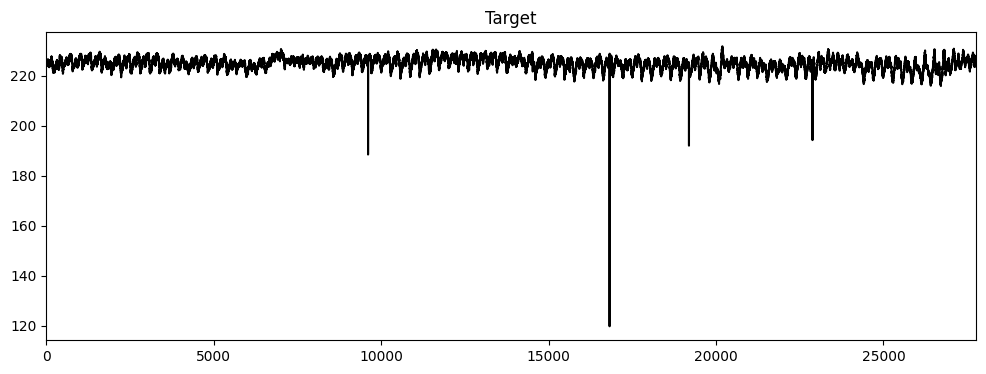

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(target.values, c='k')
plt.xlim(0, len(target))
plt.title('Target')
plt.show();

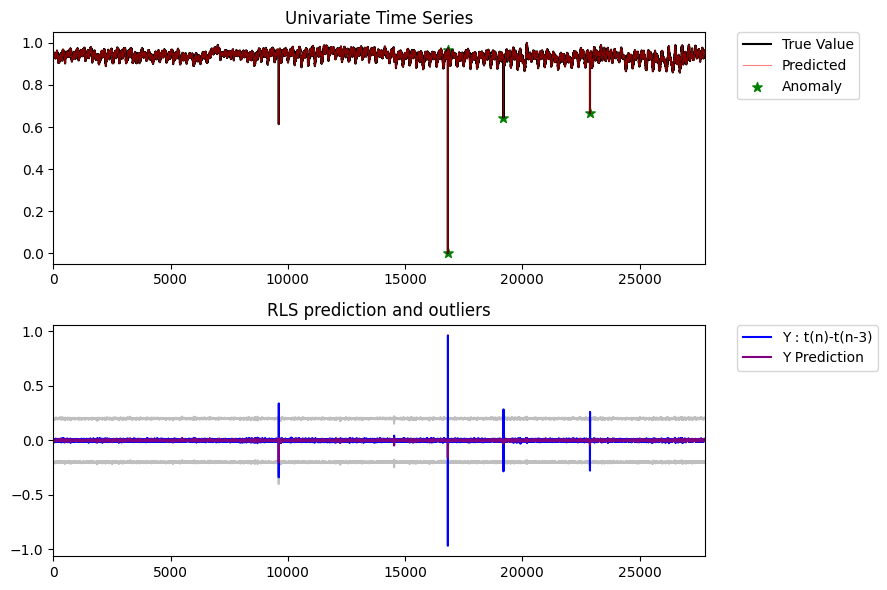

In [ ]:
# Initialize a sample time-series data
s = 3
N = len(target) # Increase N for more data points
t = target.values

# Scale t using MinMaxScaler
scaler = MinMaxScaler()
t = scaler.fit_transform(t.reshape(-1, 1)).flatten()

# Construct Y and X
Y = np.array([t[i+s+1] - t[i+1] for i in range(N-s-1)])
X = np.array([[t[i+s] - t[i]] for i in range(N-s-1)])
# Y = np.array([t[i] - t[i-s] for i in range(s, N)])
# X = np.array([[t[i] - t[i-1]] for i in range(s, N)])

# Set the forgetting factor and initial variance
lambda_ = 0.85
initial_variance = 1.0

errors = []
predictions = []

rls = RLS(dim=X.shape[1], lambda_=lambda_, initial_variance=initial_variance)

for x, y in zip(X, Y):
    error, y_pred = rls.update(x, y)
    errors.append(error)
    predictions.append(y_pred)

# Set Threshold
threshold = 0.2

# Initialize t_pred with the initial values of t
t_pred = list(t[:s+1])
anomalies = []
anomaly_indices = []

# pad Value
pad_value = s+1
# pad 함수를 사용해 배열 앞에 0을 추가
Y = np.pad(Y, (pad_value, 0), 'constant', constant_values=0)
predictions = np.array(predictions)
predictions = np.pad(predictions, (pad_value, 0), 'constant', constant_values=0)

# Generate t_pred from y_pred
for i in range(N-s-1):
    if abs(Y[i]-predictions[i]) > threshold:
        anomalies.append(t[i])
        anomaly_indices.append(i)
        t_pred.append(t[i+s+1] + predictions[i])  # Replace the true value with the predicted value
    else:
        t_pred.append(t[i+s+1])  # Else, use the true value

# Convert list to numpy array
t_pred = np.array(t_pred)

fig, axs = plt.subplots(2, 1, figsize=(9, 6))

# Set the boundaries for the X-axis
xmin, xmax = 0, len(t)

# plot T and T_reconstruct for comparison
axs[0].plot(t, label="True Value", c='k')
axs[0].plot(t_pred, label="Predicted", c='r', linewidth=0.8, alpha=0.5)
axs[0].scatter(anomaly_indices, anomalies, s=50, marker='*', color='green',
               label='Anomaly')
axs[0].set_xlim(xmin, xmax)
axs[0].set_title("Univariate Time Series")

# plot Y and Y_pred for comparison
axs[1].plot(np.array(predictions)+threshold, c='gray',alpha=0.5)
axs[1].plot(np.array(predictions)-threshold, c='gray',alpha=0.5)
axs[1].plot(Y, label=f"Y : t(n)-t(n-{s})", c='blue')
axs[1].plot(predictions, label="Y Prediction", c='purple')
axs[1].set_xlim(xmin, xmax)
axs[1].set_title("RLS prediction and outliers")

# place a legend outside of the plot for each subplot
for ax in axs:
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()

ARIMA는 주로 정상성(Stationarity)을 가진 시계열 데이터를 모델링하는 데 사용된다. 이는 시계열 데이터가 일정한 평균과 분산을 가지며, 과거의 패턴이 미래에도 동일하게 반복될 것이라는 가정에 기반한다. 그러나 RLS는 시간에 따라 변화하는 파라미터를 가진 시스템을 모델링하는 데 적합하며, 시간에 따라 변화하는 동적 시스템을 추적한다.<br>

RLS의 주요 장점 중 하나는 실시간 업데이트다. 새로운 데이터 포인트가 주어지면 RLS는 즉시 파라미터를 업데이트하며, 전체 데이터셋을 다시 계산할 필요가 없다. 이는 ARIMA 모델과 대조적이다. ARIMA에서는 새로운 데이터가 도착할 때마다 전체 모델을 다시 계산해야 한다. 따라서, 실시간 시스템에서는 RLS가 더 계산 효율성이 높아 유용하게 사용된다.<br>

ARIMA는 파라미터 튜닝을 통해 높은 예측 정확도를 달성할 수 있지만, 실시간 데이터에 대한 파라미터 업데이트와 연산 속도는 상대적으로 느리다. 이 때문에, ARIMA는 시계열 예측에는 적합하지만 이상 감지에는 제한적일 수 있다. 반면, RLS는 그 단순함과 계산 효율성 때문에 실시간 이상 감지 작업에 더욱 적합하다고 볼 수 있다.

## 결론

Recursive Least Square (RLS) 알고리즘을 활용한 시계열 이상 감지의 중요성과 그 방법을 살펴보았다. RLS는 시간이 지남에 따라 변경되는 시스템을 추적하고 예측하는 데 유용함을 확인했다.

이상 감지는 많은 분야에서 중요한 요소로 작용하며, 실시간으로 변화하는 데이터를 처리하는 데 있어서도 매우 중요하다. 특히, 제조업(금융, 의료, 보안 등)의 분야에서는 이상 감지가 매우 중요한 역할을 하고 있다.

RLS를 이용하면, 이러한 분야에서 발생하는 데이터를 더 효과적으로 처리하고 이상을 더 빠르게 감지할 수 있다. 이를 통해, 보다 효율적인 이상 감지 시스템을 구축하고 문제를 더 빠르게 해결할 수 있다.

RLS를 이용한 시계열 이상감지와 다른 알고리즘을 결합하여 더 향상된 이상감지 방법을 개발하는 방향으로 연구를 더 할 예정이다. 이를 통해 시계열 이상감지는 보다 향상될 수 있으며, 이를 통해 제조업의 공정 모니터링(금융, 의료, 보안 등의) 분야에서 더 나은 의사결정을 할 수 있게 될 것이다.